# Homework-week5
## 前三题必做

## 1. 不考虑多头的原因，self-attention中词向量不乘QKV（Wq、Wk、Wv）参数矩阵，会有什么问题？


分别乘$W_{q},W_{k},W_{v}$三个矩阵是为了增加更多的参数，提高模型效果

这三个矩阵是随机初始化的，维度为（64，512），其值在反向传播的过程中会一直进行更新来学习序列之间的关系

如果直接用输入序列x的embedding，embed_x去进行self-attention, 运行self.embedding(x)和positional encoding之后这个数据就会固定，模型无法去学到序列词之间的关系


## 2. Transformer的点积模型做缩放的原因是什么？

attention计算有两种方式：

1. add

$$score(h_{t},h_{s}) = V_{\alpha}^{T}tanh(W_{1}*h_{t}+W_{2}*h_s) $$

2. mul

$$score(h_{t},h_{s}) = h_{t}^{T}*W*h_{s}$$

transformer的点积模型针对的是mul attention, 需要做缩放，而在其他基于add sttention的模型不需要缩放。

引用自论文《Attention Is All You Need》

+ We suspect that for large values of $d_{k}$, the dot products grow large in magnitude, pushing the softmax function into regions where it has
extremely small gradients. To counteract this effect, we scale the dot products by $\frac{1}{d_{k}}$
+ 极大的点积值将整个 softmax 推向梯度平缓区，使得收敛困难

+ 查看softmax对于一组向量中最大元素的表现结果
    + 假定输入一组向量关系为\[ x, 2x, 3x \] , 其中第三个元素:3x 是其中绝对值最大的元素

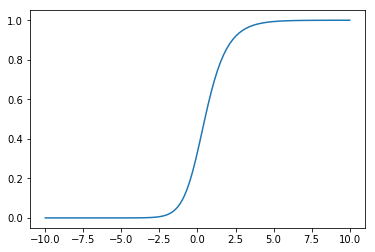

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    return np.exp(3*x)/(np.exp(x)+np.exp(2*x)+np.exp(3*x))
x = np.linspace(-10, 10, num=100)
y = softmax(x)
plt.plot(x,y)
plt.show()

可以看到，在数量级较大时，softmax将几乎全部的概率分布都给了最大值对应的label。导致梯度消失，造成参数更新困难。所以需要对点积模型做缩放

## 3. Self-Attention 的时间复杂度是怎么计算的？为多少？

假设
+ 输入序列和长度为n，每个元素的维度为𝑑:{𝑥1,...,𝑥𝑛}
+ 输出序列长度也为n，每个元素的维度也是d：{𝑦1,...,𝑦𝑛}
+ 考虑到n个key和n个query两两点乘，因此self-Attention每层计算复杂度为𝑂($𝑛^{2}∗𝑑$)

## 附加思考题（可做可不做）：

根据问题3求的计算复杂度可以看出，输入序列长度过长会造成计算量太大，那你有什么的想法从结构上改进么？

引用自论文《Attention Is All You Need》
![title](./datasets/dot.png)

引用自论文《Attention Is All You Need》

+ To improve computational performance for tasks involving very long sequences, self-attention could be restricted to considering only a neighborhood of size r in the input sequence centered around the respective output position. This would increase the maximum path length to O(n/r)

+ 当𝑛<𝑑时，self attention要比RNN和CNN快

+ 当𝑛>𝑑时，作者给出了一种解决方案"受限self attention": 每个词不是和所有词计算attention，而是只与每个输出位置附近窗口的r个词去计算attention。每层计算复杂度降为𝑂(𝑟∗𝑛∗𝑑)。但是最长学习距离降低为r，所以需要执行𝑂(𝑛/𝑟)次才能覆盖到所有输入。